# Exploratory Data Analysis

Library Versions used
- feature-engine==1.0.2
- joblib==1.0.1
- matplotlib==3.3.4
- numpy==1.20.1
- pandas==1.2.2
- scikit-learn==0.24.1
- scipy==1.6.0
- seaborn==0.11.1
- statsmodels==0.12.2

**References**

Galli, S. & Samiullah, C. (2024). Deployment of Machine Learning Models. Udemy.

## Predicting Sale Price of Houses

In [164]:
# handling data
import pandas as pd
import numpy as np

# handling plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for yeo-johnson transformation
from scipy import stats
import scipy.stats as stats

# to disply all columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [114]:
# Loading Data
data = pd.read_csv('train.csv')

# Data rows and columns 
print(data.shape)

# visualizing data
data.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [115]:
# dropping: id - not really important (house identifier)
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

### Analyzing:
- Targert Var
- Var types (cat. and num.)
- Missing
- Num. types: Discrete, Continuous, Distributions, & Transformations
- Cat. types: Cardinality, Rare Labels, Special mappings
- Additional Reading Resources

 #### Target Var.

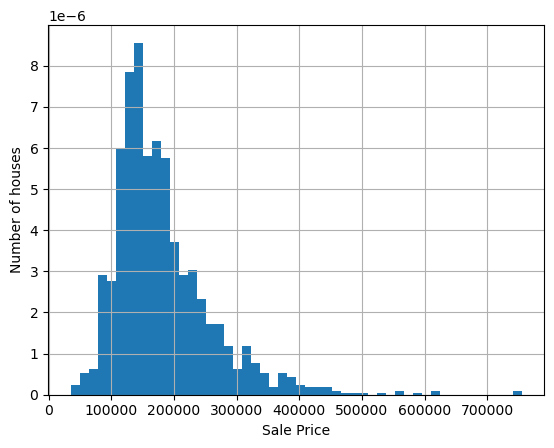

In [118]:
# Building a histogram
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

- Target variable is continous - distribution is positively skewed.
- transforming data to improve the spread of the data.

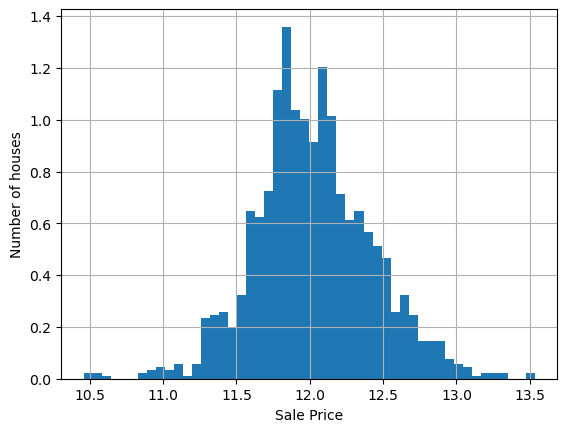

In [120]:
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

- After transformation, the data is normally distributed (more Gaussian looking).

### Variable Types

In [123]:
#data.info()

In [124]:
# Identifying categorical variables (object)
# Definitions are found in the data_description.txt
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass - cat var by definition despite its numeric values - as found in the data definitions

# adding MSSubClass to the list of cat vars.
cat_vars = cat_vars + ['MSSubClass']

# capturing the number of cat. vars.
len(cat_vars) # totalling 44

44

In [125]:
# Identifying the numcerical variables
num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]

# Capturing the number of num vars.
len(num_vars) # totalling 35

35

### Missing values

In [127]:
# listing variables that contain missing informatin
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# Determingin % of missing values (in decimals)
# displaying result ordered by % of missing values

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

- There are a few variables containing most of its values as missing (the top four).
- There are other variables with a small % of missing observations
- In order to train a ML model with this data set, data imputation is necessary.
- Below is a visualization of the missing values in the above list. 

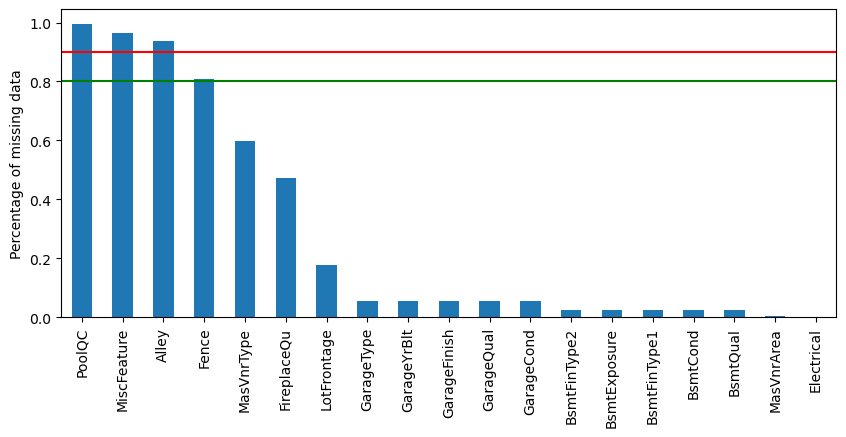

In [129]:
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [130]:
# determing which from the missing data list is num. and cat.

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of Cat. Vars: ', len(cat_na))
print('Number of Num. Vars: ', len(num_na))

Number of Cat. Vars:  16
Number of Num. Vars:  3


In [131]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [132]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Relationship between missing data and Sale Price
- Evaluating the price of the house in observations where there is missing information. 
- Doing this for each variable showing missing data
- NOTE: I've never done this before

In [134]:
def analyse_na_value(df, var):
    
    # copy data so we don't override og data.
    df = df.copy()

    # making interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # comparing median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determining median price in 1, 0 groups,
    # and SD of the sale price,
    # and capturing results in a temp dataset
    tmp=df.groupby(var)['SalePrice'].agg(['mean','std'])

    # ploting into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

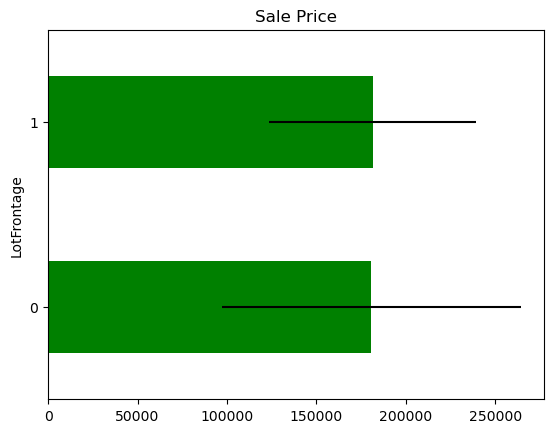

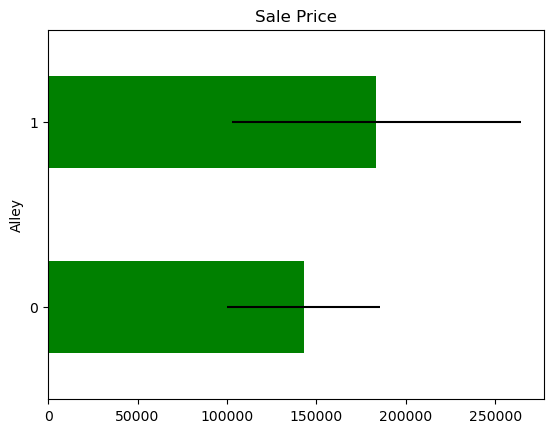

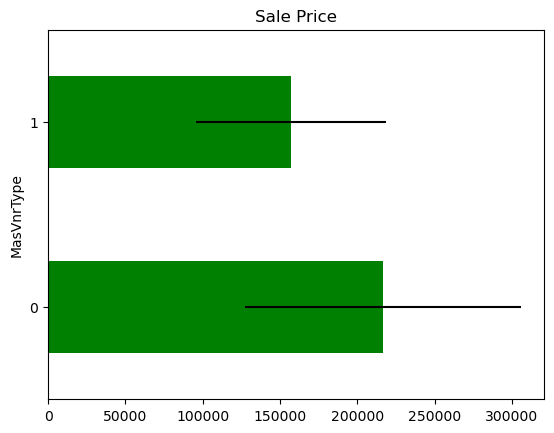

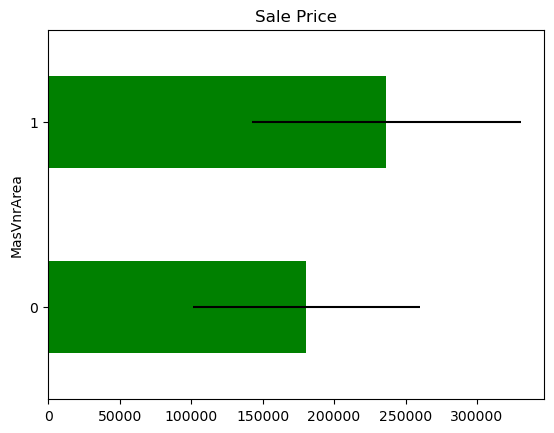

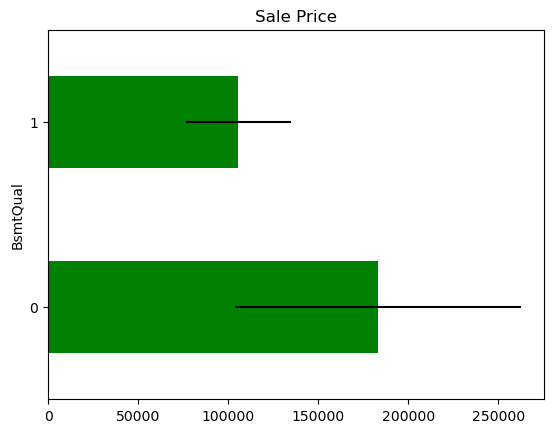

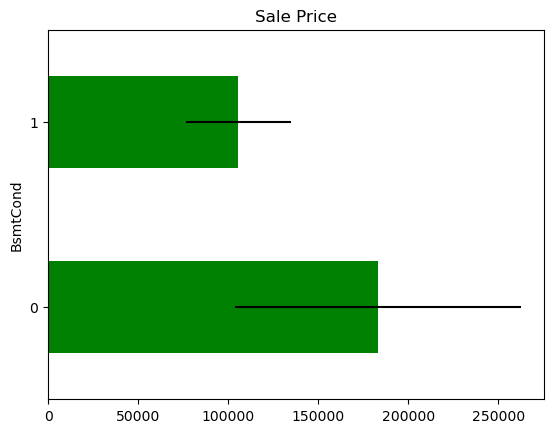

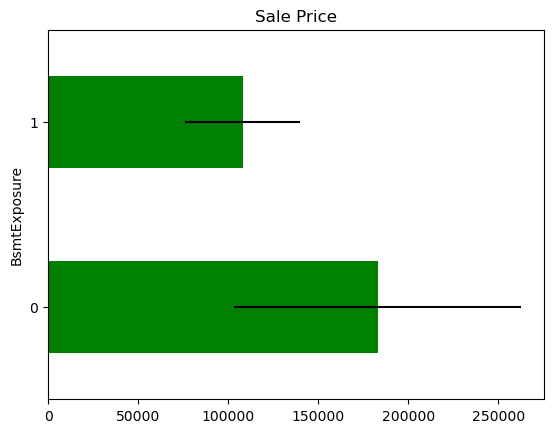

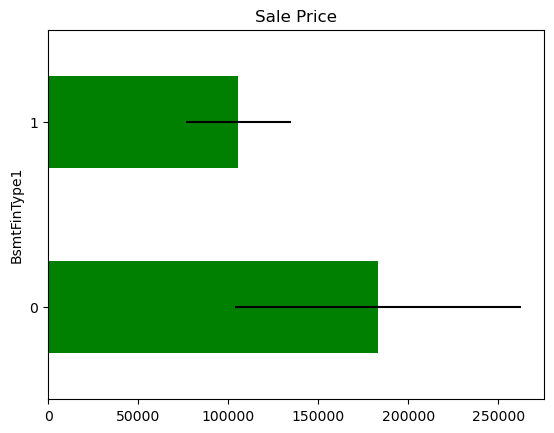

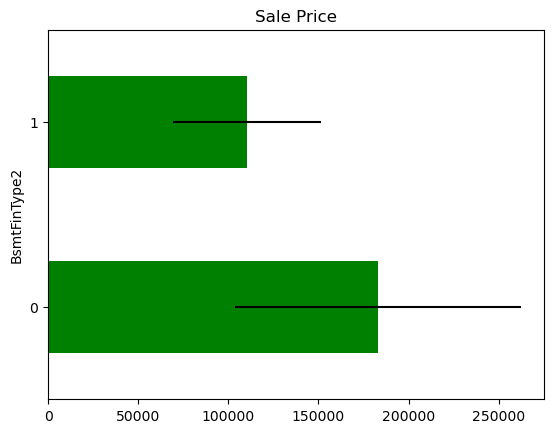

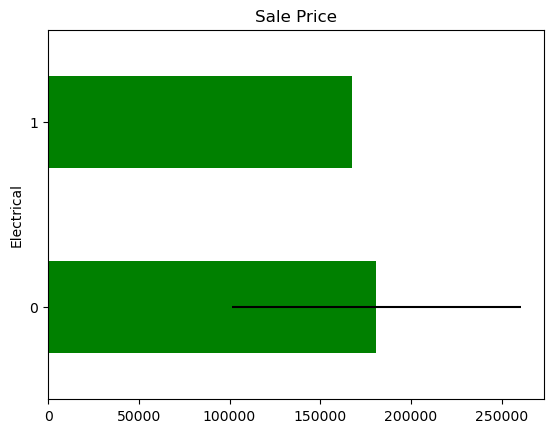

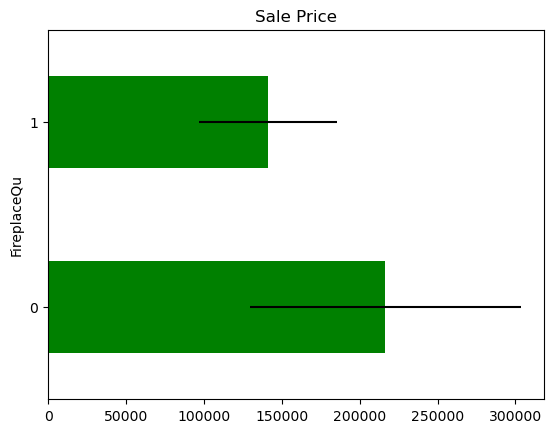

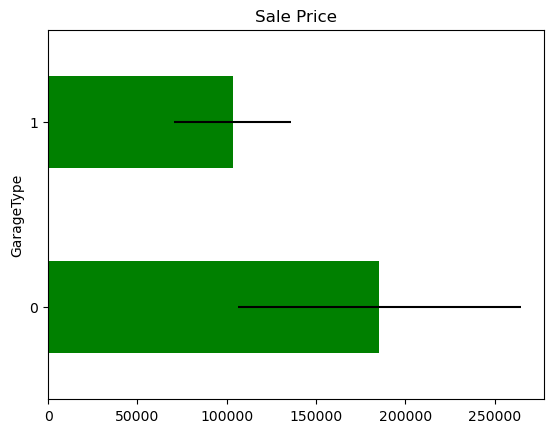

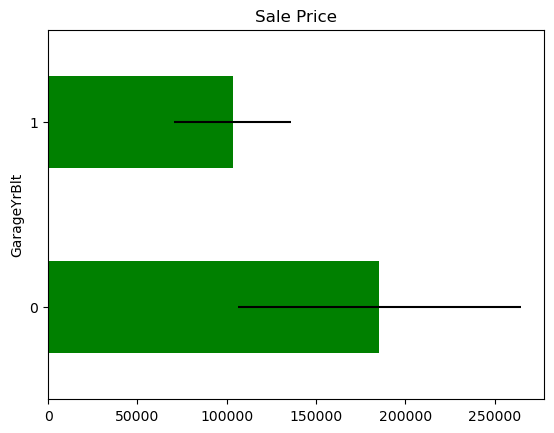

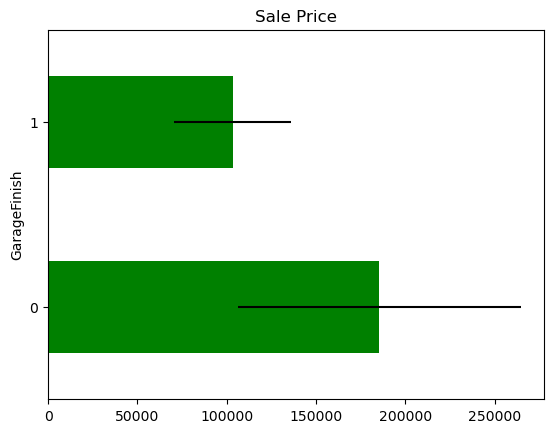

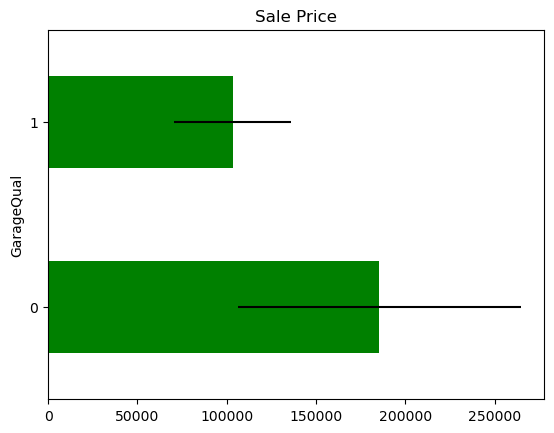

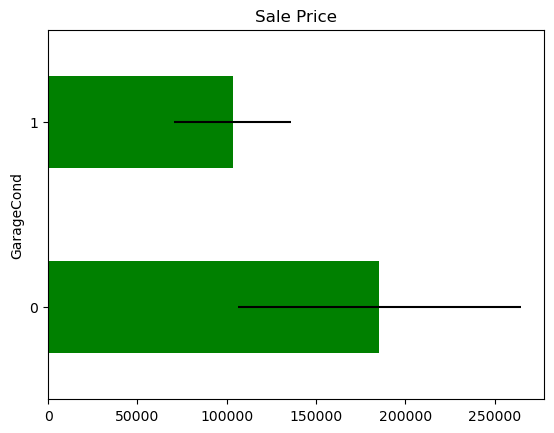

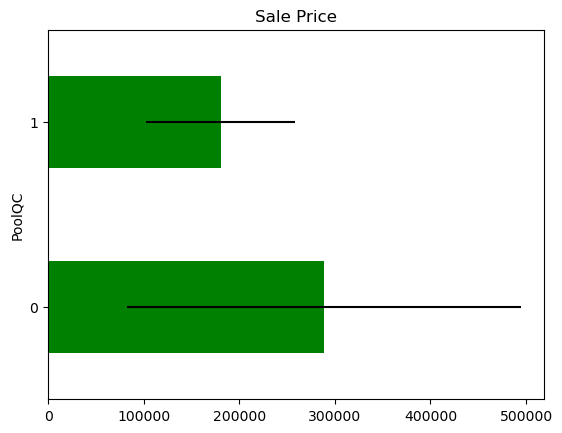

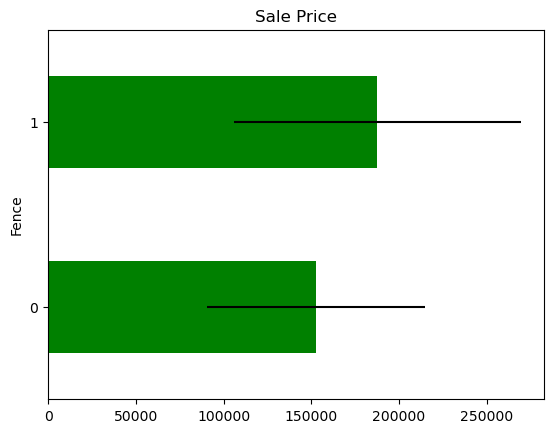

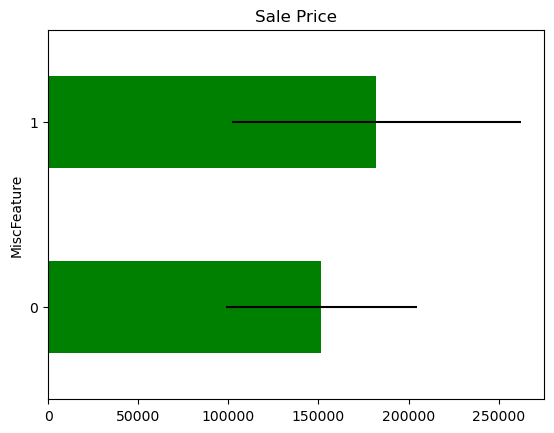

In [135]:
# Running the above function

for var in vars_with_na:
    analyse_na_value(data, var) 
    
    # This is neat
    # and very useful!!

### Numerical Variables

In [137]:
print('Number of numerial variables: ', len(num_vars))

# Viz of num variables
data[num_vars].head()

Number of numerial variables:  35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


#### Temporal variables
- There are 4 year variables:
    - YearBuilt
    - YearRemodAdd
    - GarageYrBlt
    - YrSold

In [139]:
# List of year varaibles / vars that contain yr information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars # there is four

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [140]:
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0, 0.5, 'Median House Price')

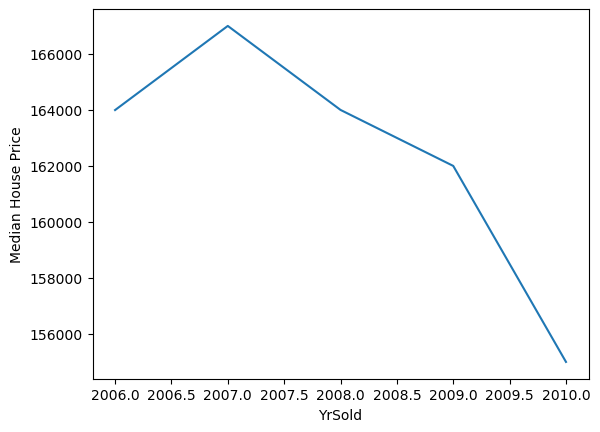

In [141]:
# Plotting median sale price vs year sold
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

NOTE: The drop off represents a decrease in house value, which is unusal as house prices typically go up over time. 

Text(0, 0.5, 'Median House Price')

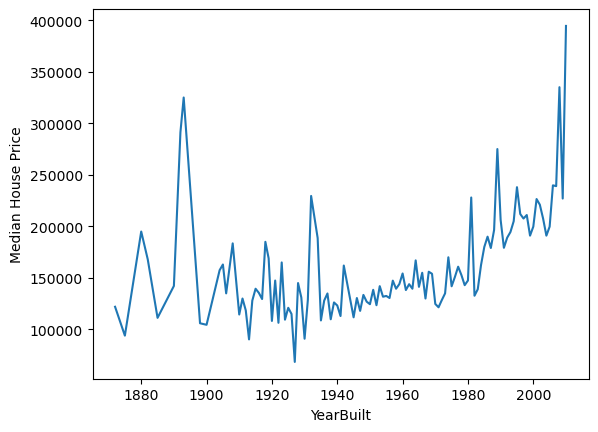

In [143]:
# Plotting median sale price vs year blt
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

NOTE: New houses are more expensive - analyzing further

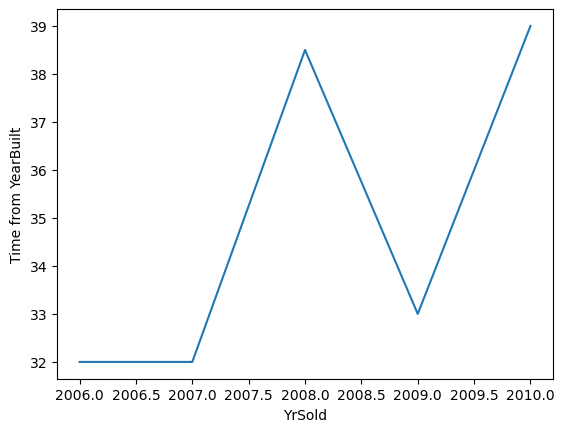

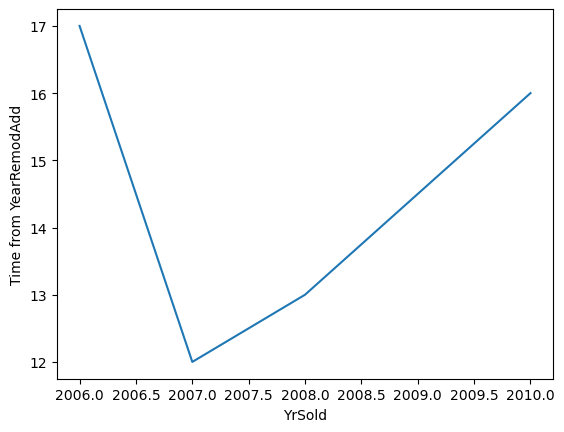

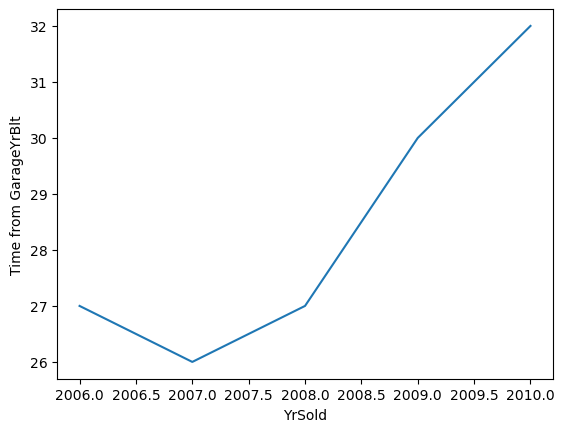

In [145]:
def analyse_year_vars(df, var):
    df = df.copy()

    # capturing differences between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]

    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)

NOTE: We see towards 2010 house sold had older garages, not been remodelled, which might explain why we see cheaper prices inrecnet years. 

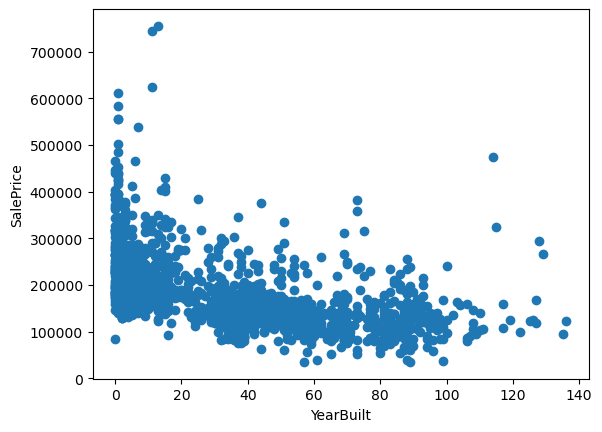

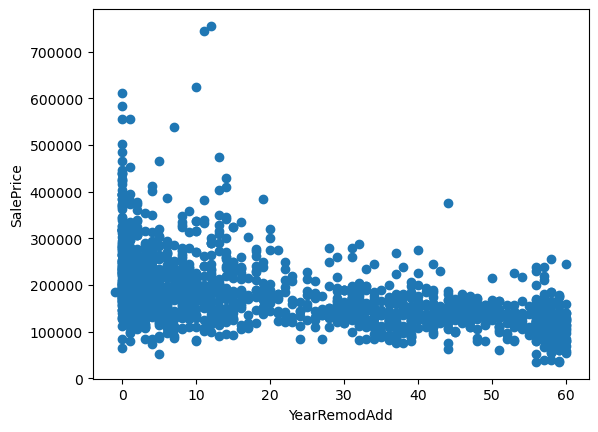

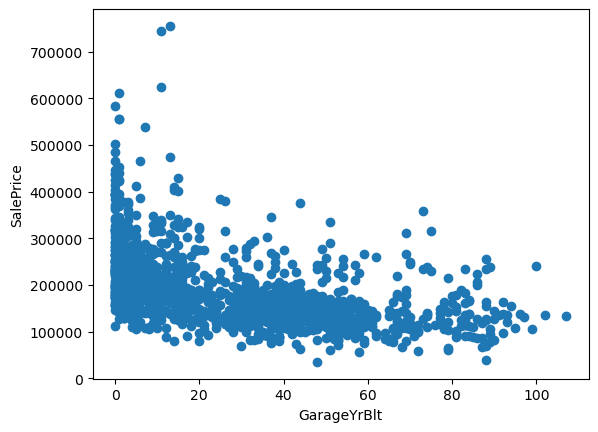

In [147]:
def analyse_year_vars(df, var):
    df = df.copy()

    # capturing differences between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)

#### Discrete Variables

In [149]:
# Making a list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [150]:
# Visualizing discrete vars
data[discrete_vars].head()

# Expectation is higher prices with bigger numbers

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


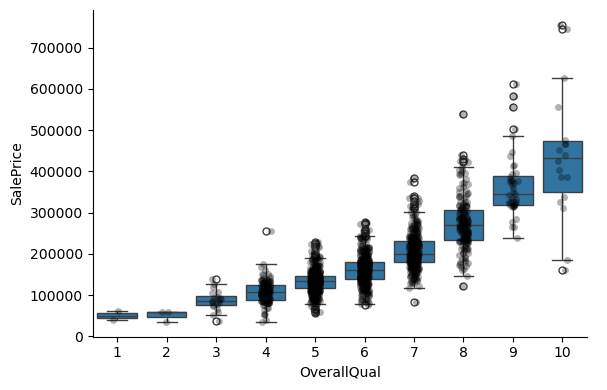

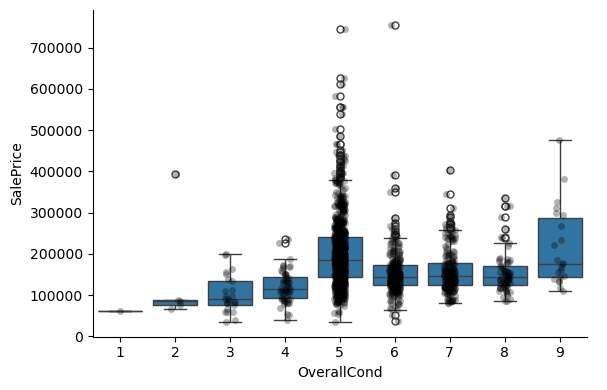

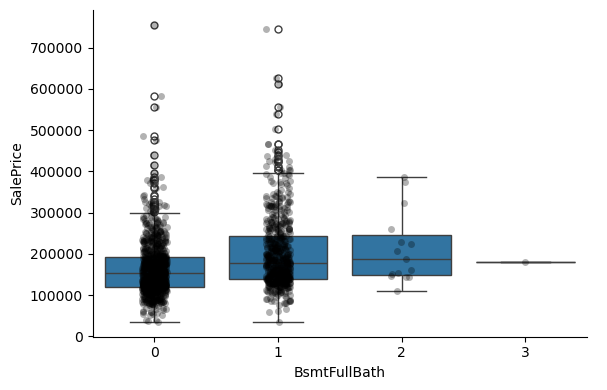

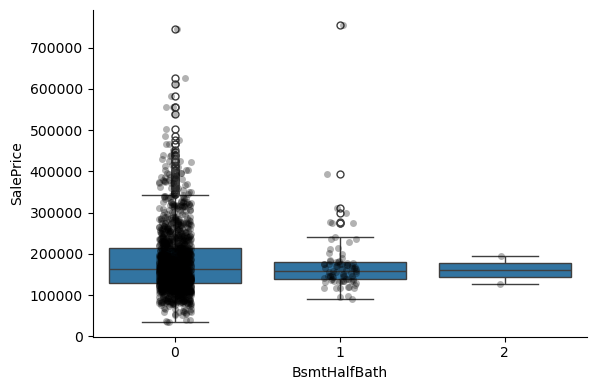

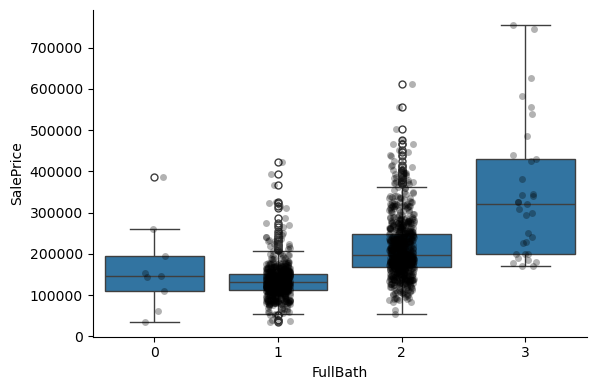

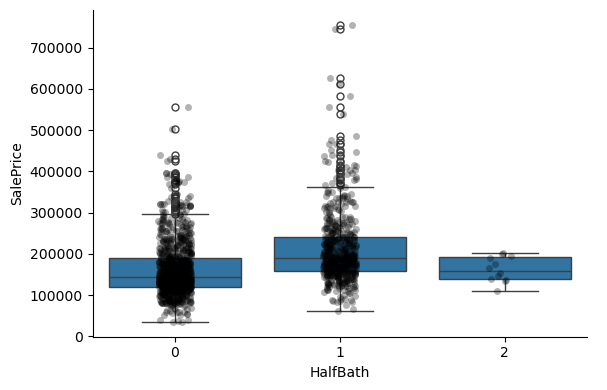

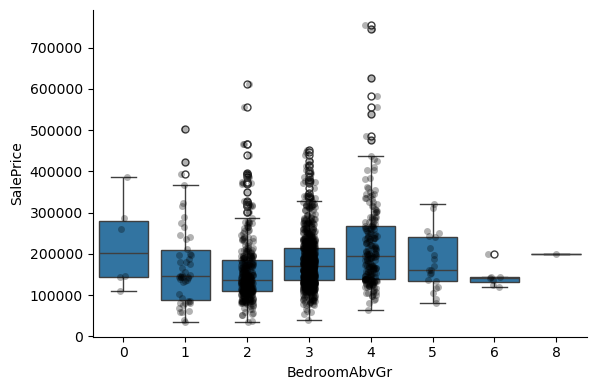

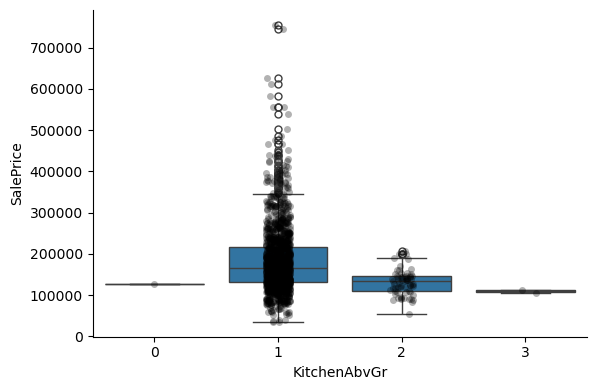

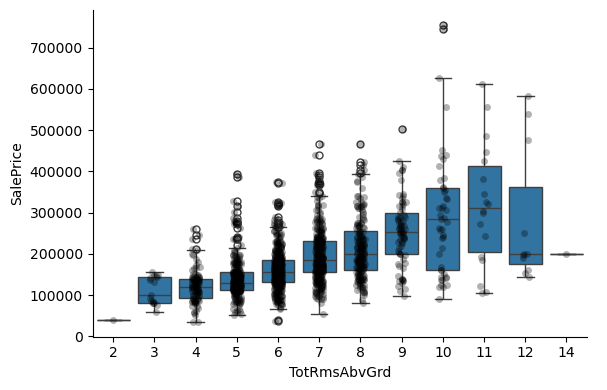

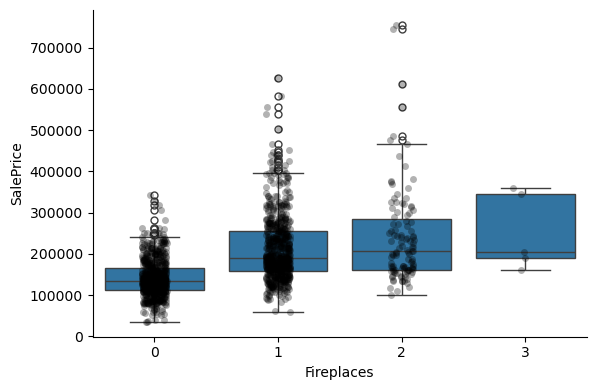

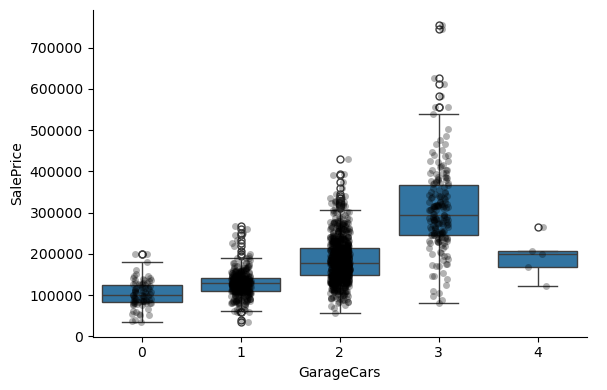

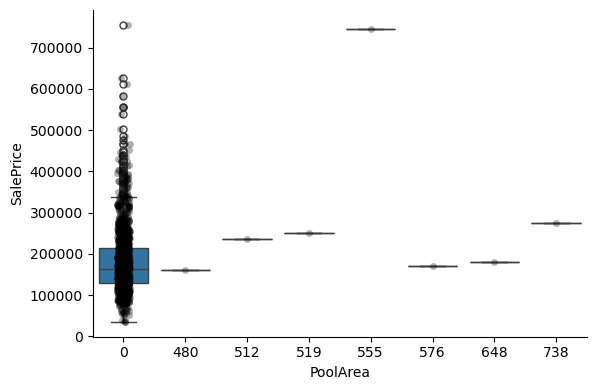

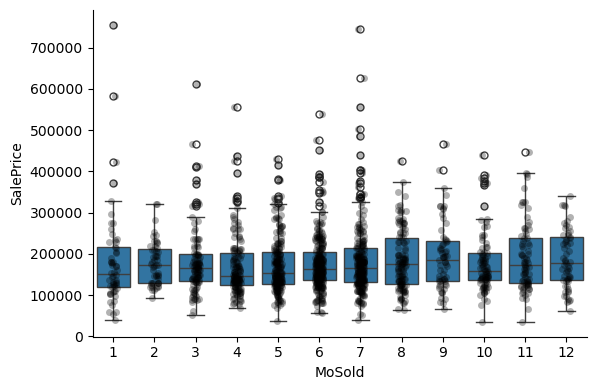

In [151]:
for var in discrete_vars:
    # boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

#### Continuous variables

In [153]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [154]:
# Vixualizing ont vars
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


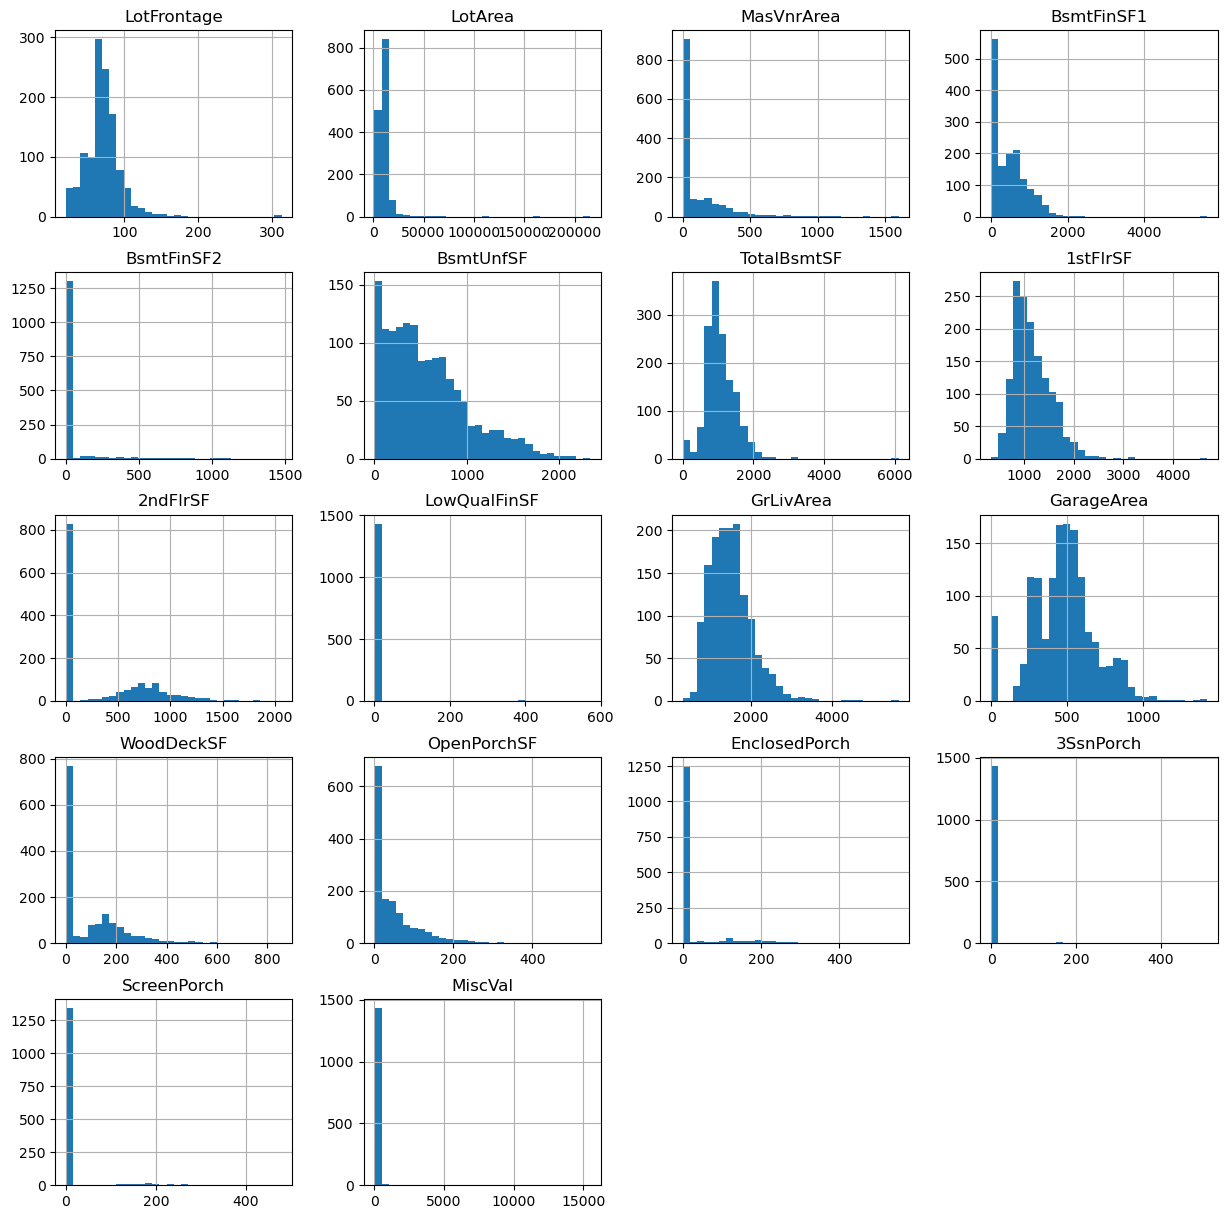

In [155]:
# plotting histogram for cont_vars
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [156]:
## Capturing skewed variables for later
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [157]:
# capture the remaining continuous variables

cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

#### Yeo-Johnson transformation

LotFrontage    0
LotArea        0
MasVnrArea     0
BsmtFinSF1     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
dtype: int64
LotFrontage    True
LotArea        True
MasVnrArea     True
BsmtFinSF1     True
BsmtUnfSF      True
TotalBsmtSF    True
1stFlrSF       True
2ndFlrSF       True
GrLivArea      True
GarageArea     True
WoodDeckSF     True
OpenPorchSF    True
dtype: bool


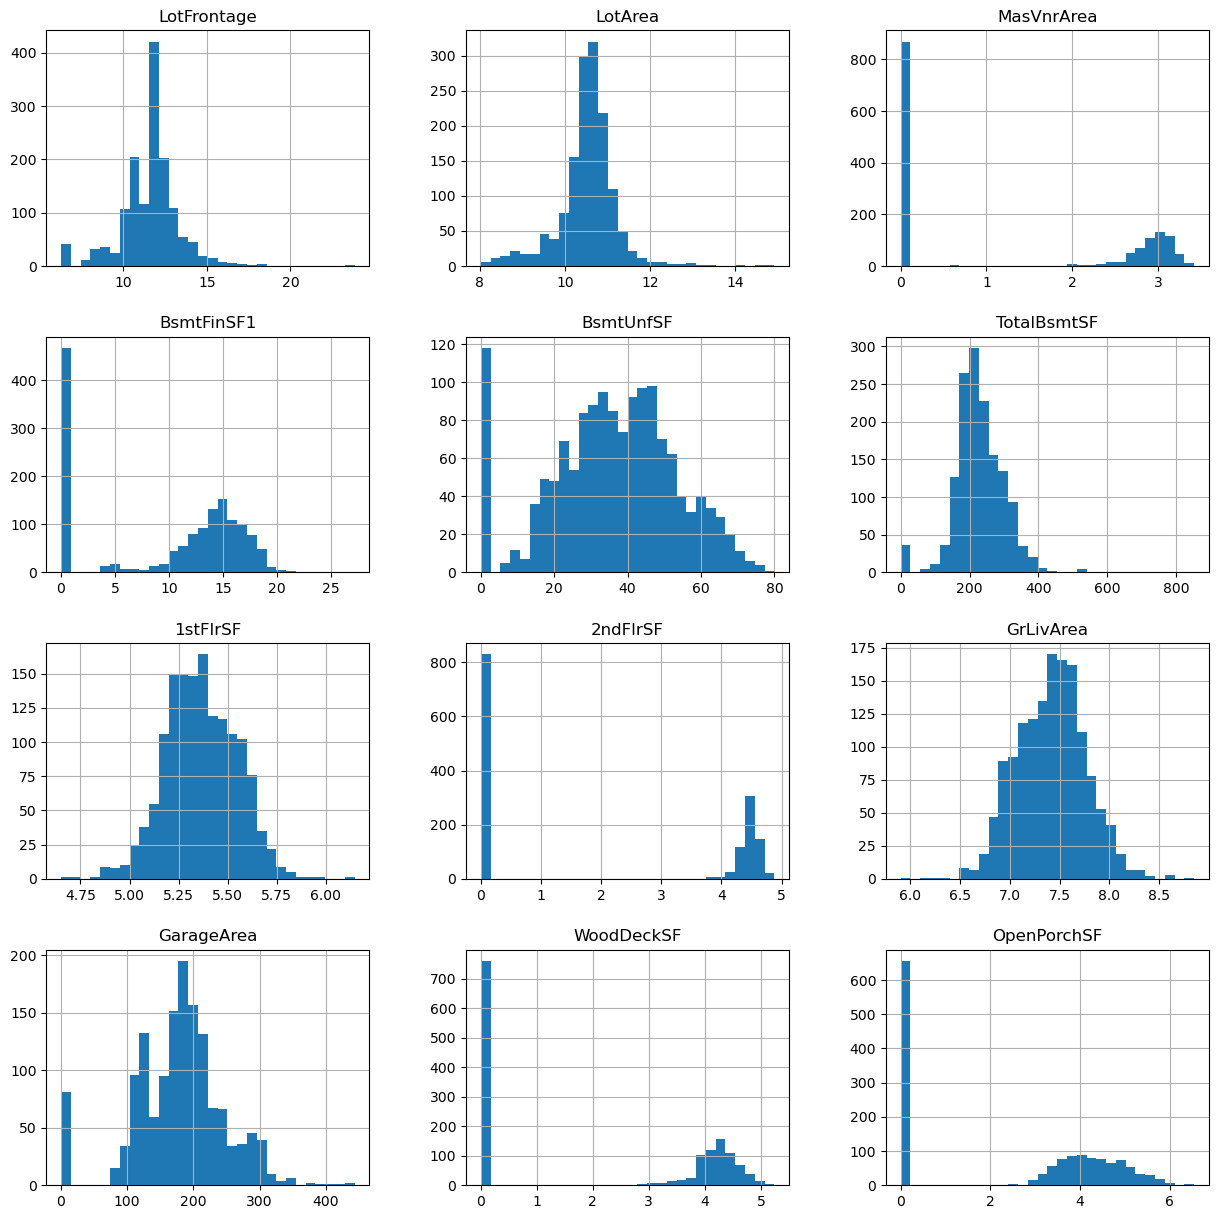

In [204]:
## ANalyzing the distribution of variables after applying yeo-johnson transformation
try:
    # Temporary copy of data
    tmp = data.copy()

    # Treat `False` as NaN and replace with the median
    tmp["LotFrontage"] = tmp["LotFrontage"].replace(False, np.nan)
    tmp["LotFrontage"] = tmp["LotFrontage"].fillna(tmp["LotFrontage"].median())

    tmp["MasVnrArea"] = tmp["MasVnrArea"].replace(False, np.nan)
    tmp["MasVnrArea"] = tmp["MasVnrArea"].fillna(tmp["MasVnrArea"].median())

    # Check for missing or infinite values
    print(tmp[cont_vars].isnull().sum())  # Check for NaNs
    print(np.isfinite(tmp[cont_vars]).all())  # Check if all values are finite

    # Apply Yeo-Johnson transformation to each variable
    for var in cont_vars:
        tmp[var], param = stats.yeojohnson(tmp[var])

    # Plot the transformed variables using histograms
    tmp[cont_vars].hist(bins=30, figsize=(15, 15))
    plt.show()

except Exception as e:  # Catch any exception and get its details
    print(f"An error occurred: {e}")

NOTE: The two variables I had 'False' or NAs in, there were replaced with the **median** (LotFrontage and MasVnrArea) do not appear the same (results are different) in the video.. In the video they were heavily skewed, where as now they present more normally distributed. **This will change results moving forward**

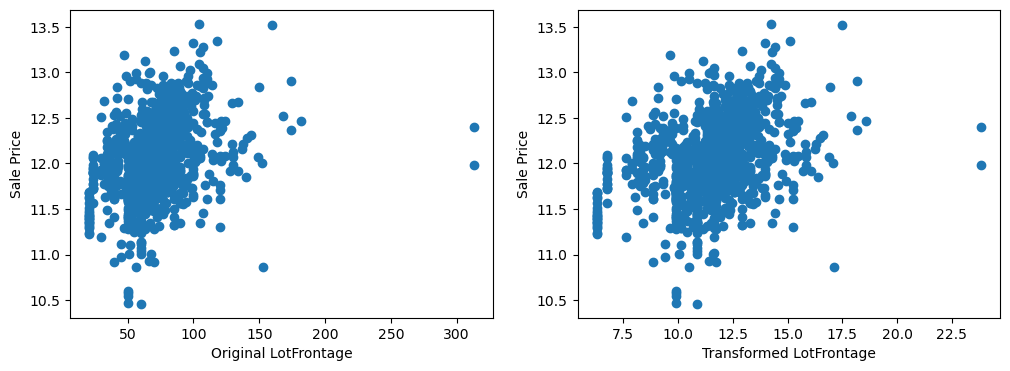

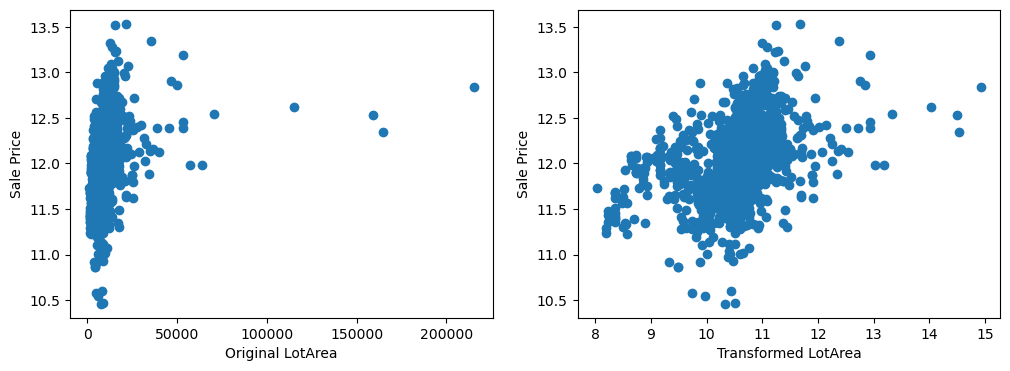

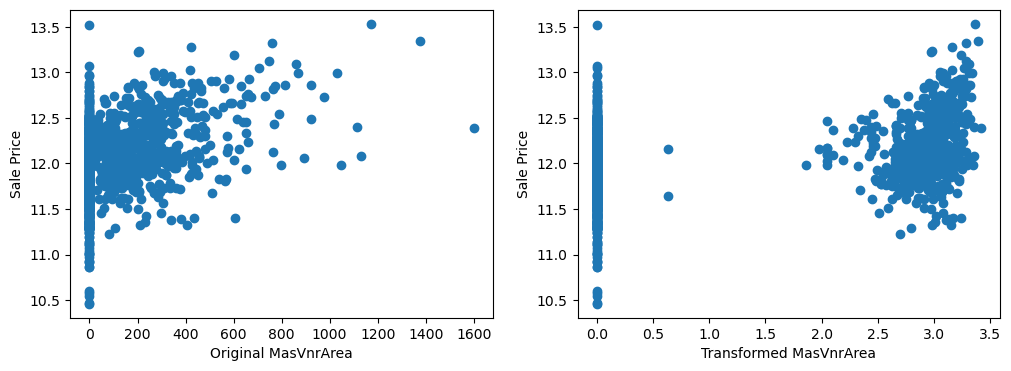

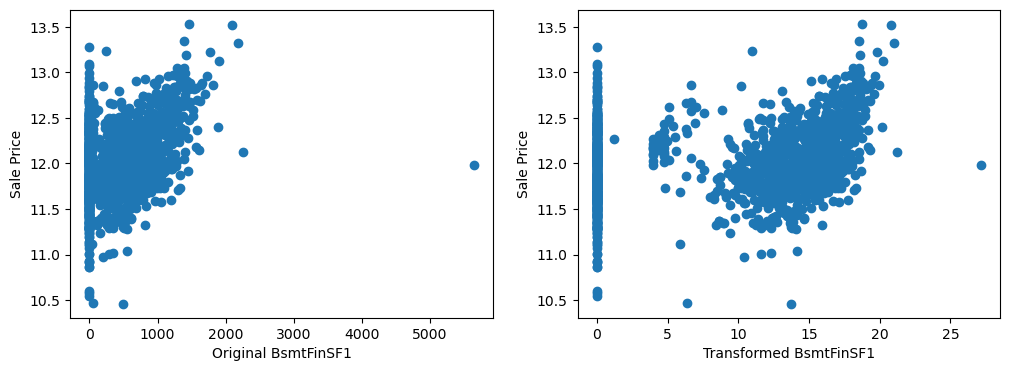

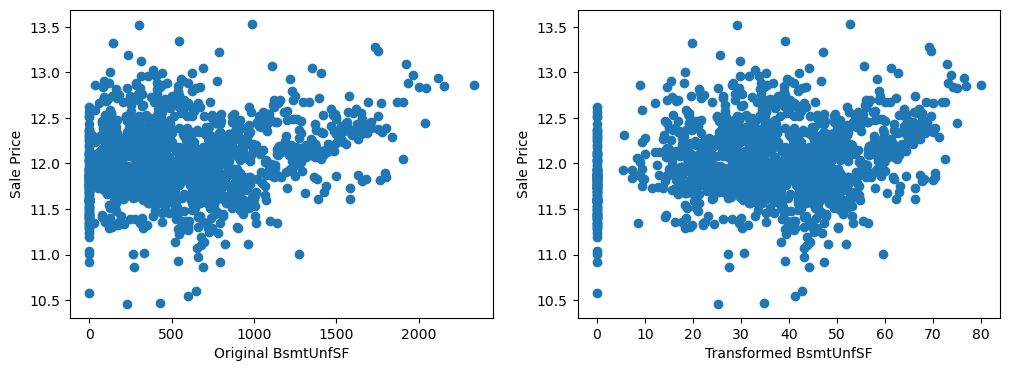

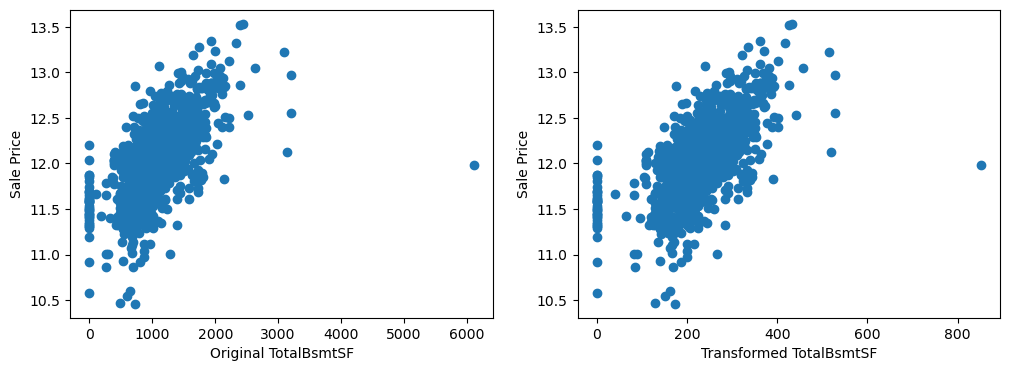

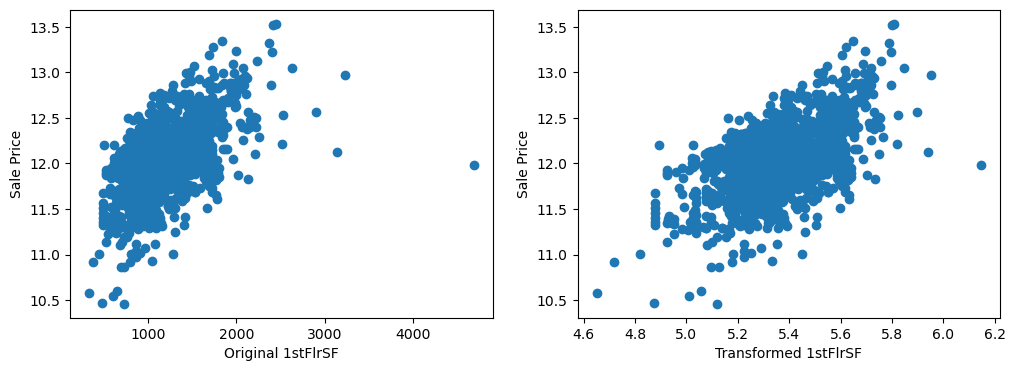

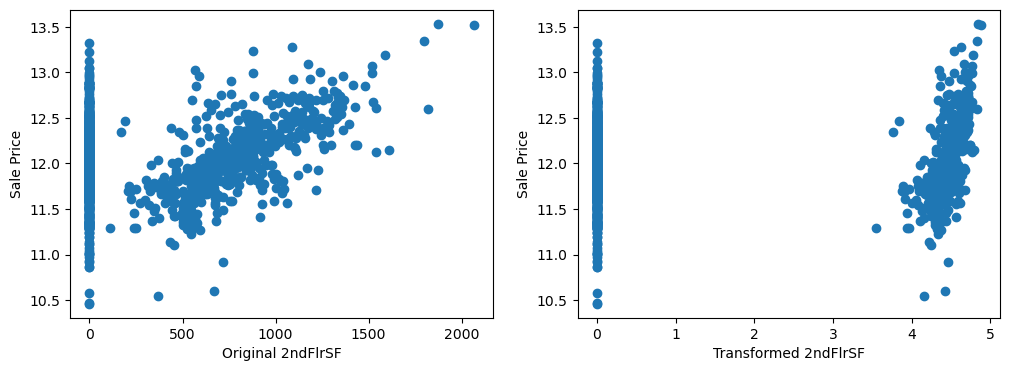

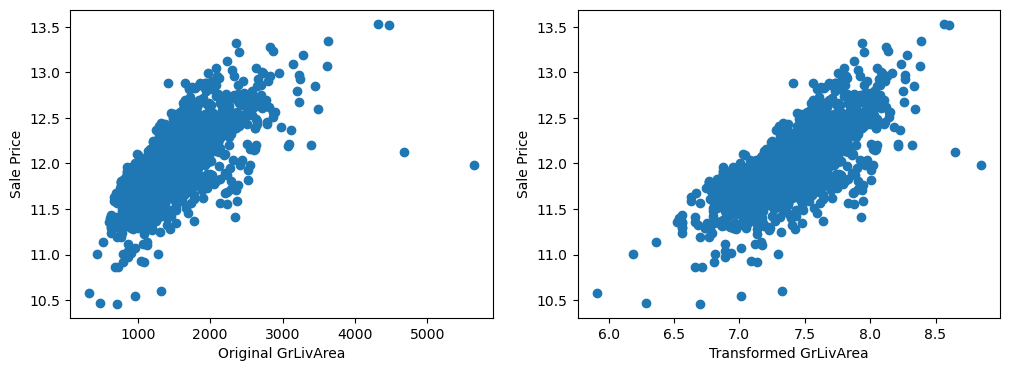

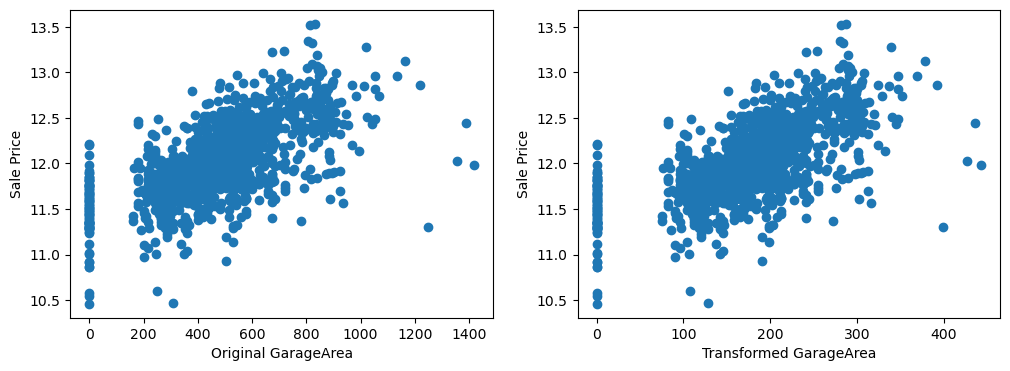

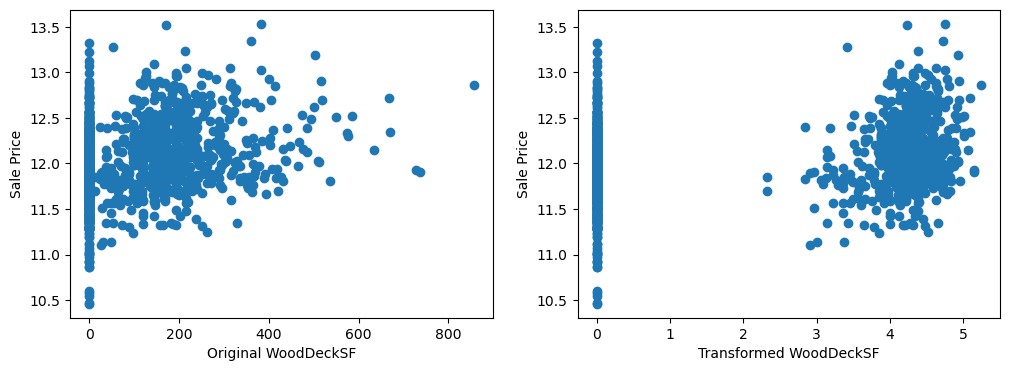

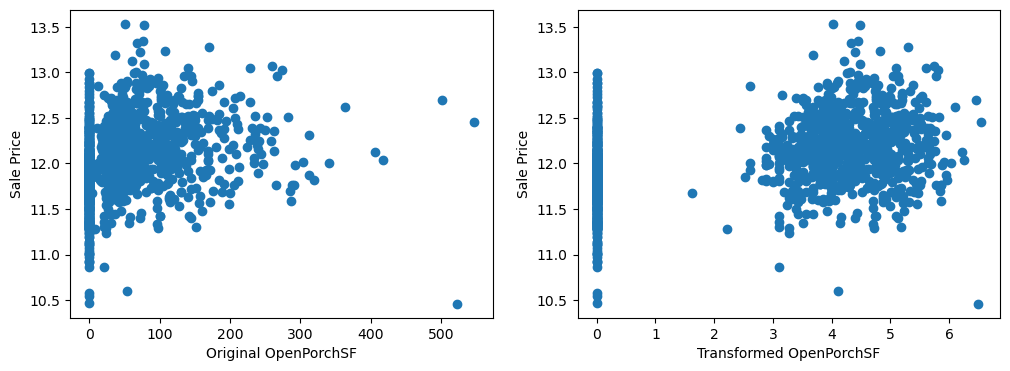

In [207]:
# Plotting the original or transformed varialbes
# vs sale price, and see if there is a relationship

for var in cont_vars:

    plt.figure(figsize=(12,4))

    # Plotting original var. vs sale price
    plt.subplot(1,2,1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # Plot transformed variable vs sale price
    plt.subplot(1,2,2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

LogFrontage and MsVnrArea different results --- but we are changing transformations

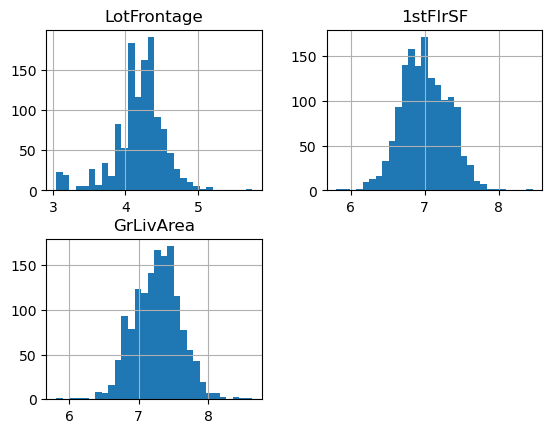

In [214]:
# Analyzing distributions of these variables after applying a logarithmic transformations

try:
    
    tmp = data.copy()
    for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
        # Transforming with logarithm
        tmp[var] = np.log(data[var])

    tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
    plt.show()

except Exception as e:  # Catch any exception and get its details
    print(f"An error occurred: {e}")

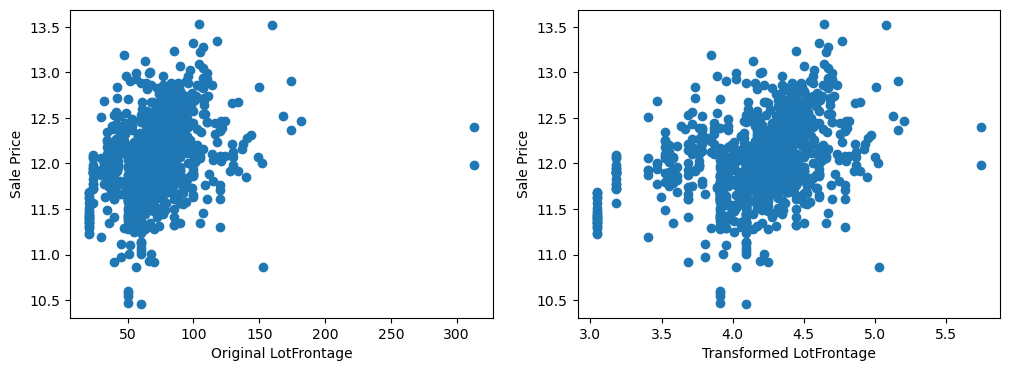

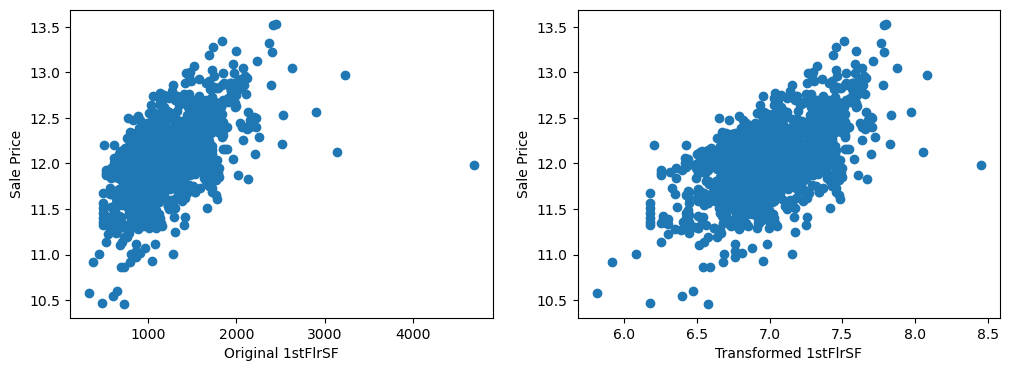

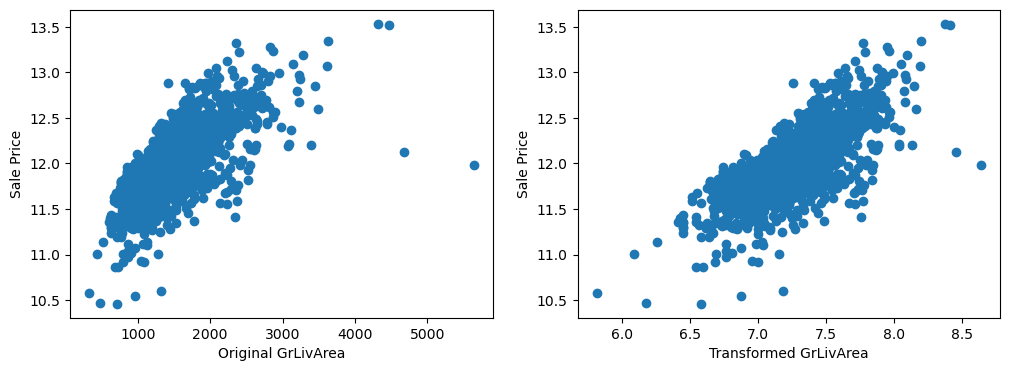

In [216]:
# Lets plot original or transformed variables vs sales price to compares/ if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    plt.figure(figsize=(12,4))

    # original vs sale price vars
    plt.subplot(1,2,1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # Transformed vs sale price vars
    plt.subplot(1,2,2)
    plt.scatter(tmp[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()
    

#### Skewed Varialbes

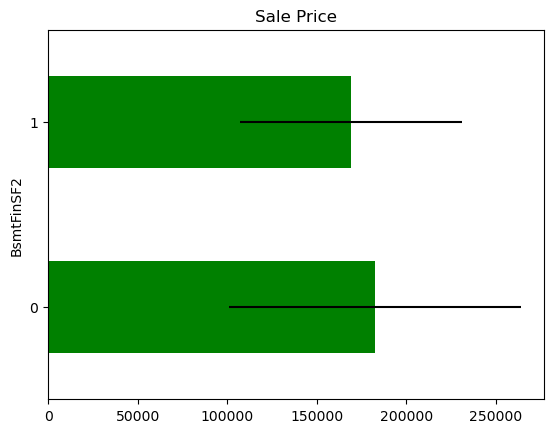

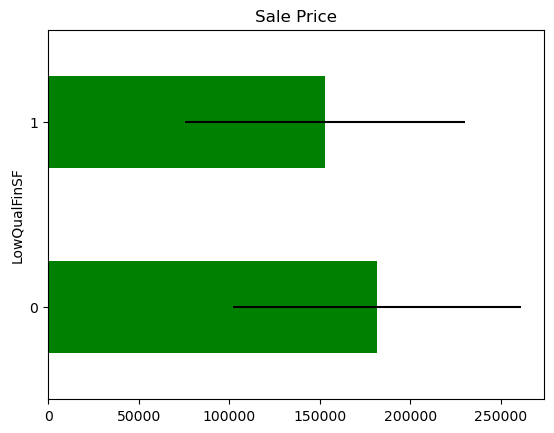

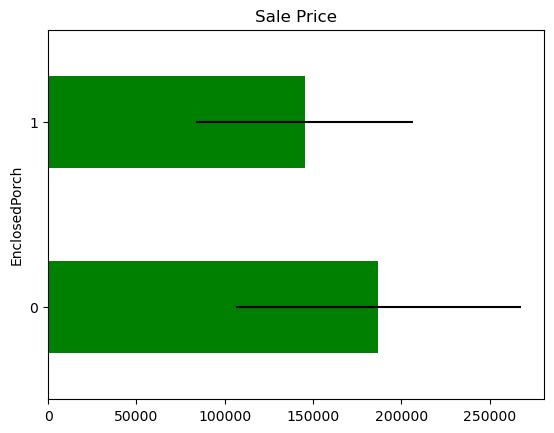

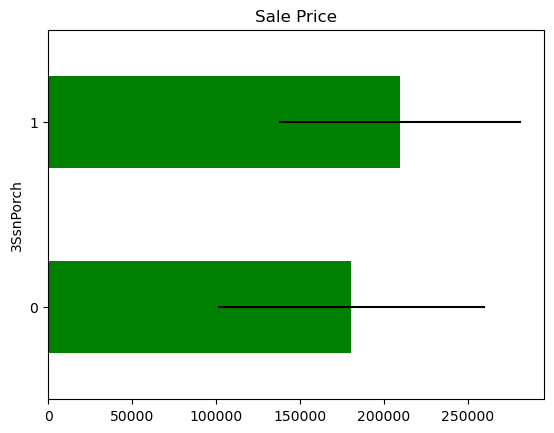

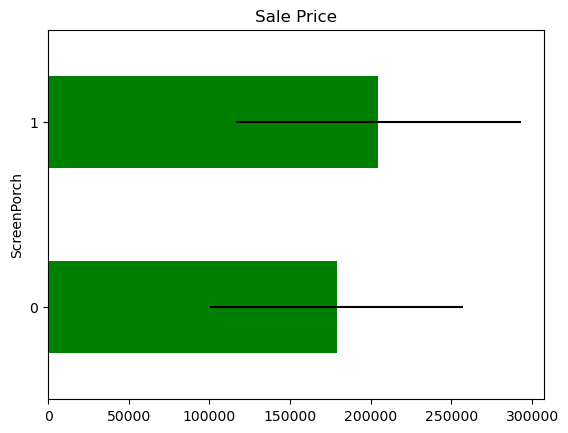

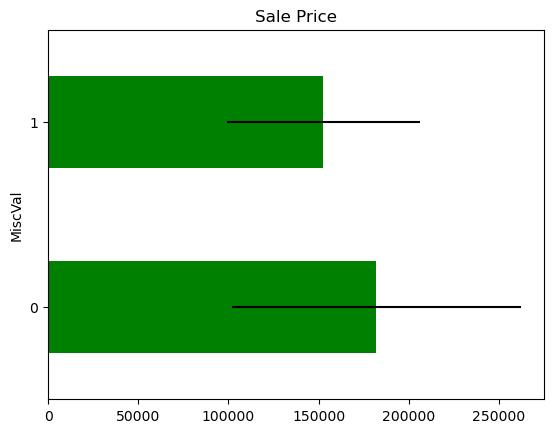

In [223]:
for var in skewed:

    tmp = data.copy()

    # Mapping var values into 0 and 1
    tmp[var] = np.where(data[var]==0,0,1)

    # mean sale price in mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind='barh', y="mean", legend=False,
             xerr="std", title="Sale Price", color="green")
    
    plt.show()